In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
data2=data.copy()
test2=test.copy()

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


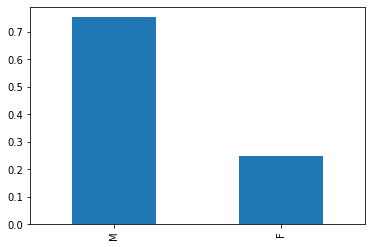

In [8]:
#EDA
#Univariate Analysis
data['Gender'].value_counts(normalize=True).plot.bar()

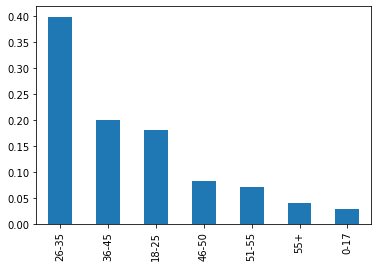

In [9]:
data['Age'].value_counts(normalize=True).plot.bar()

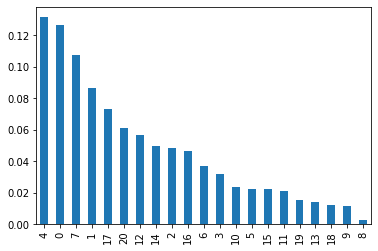

In [11]:
data['Occupation'].value_counts(normalize=True).plot.bar()

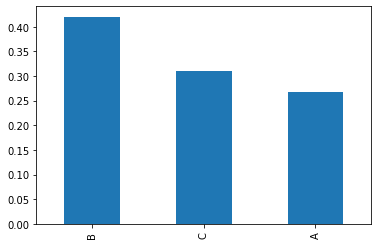

In [13]:
data['City_Category'].value_counts(normalize=True).plot.bar()

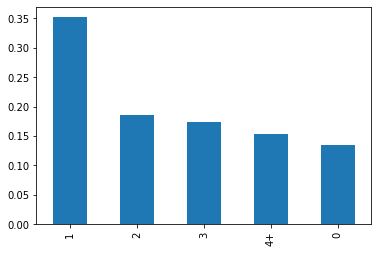

In [14]:
data['Stay_In_Current_City_Years'].value_counts(normalize=True).plot.bar()

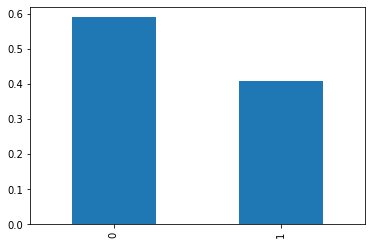

In [15]:
data['Marital_Status'].value_counts(normalize=True).plot.bar()

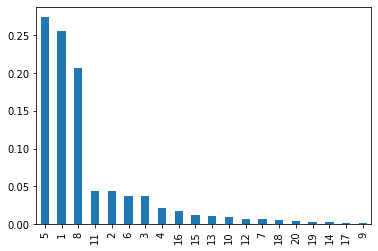

In [16]:
data['Product_Category_1'].value_counts(normalize=True).plot.bar()

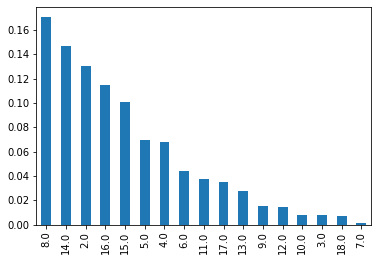

In [17]:
data['Product_Category_2'].value_counts(normalize=True).plot.bar()

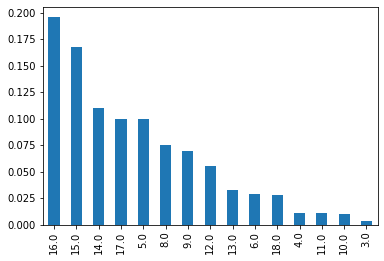

In [18]:
data['Product_Category_3'].value_counts(normalize=True).plot.bar()

#Data inferred from univariate analysis

1.Almost 75% of people are Male

2.Most of the people almost 40% are in the age grp of 26-35

3.Most people lives in city category B

4.Most of the people i.e 35% lives in there current cities from 1 year

5.Almost 58% of the people are unmarried


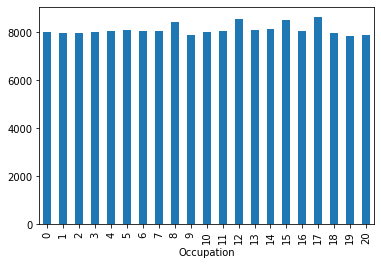

In [67]:
#Bivariate analysis
occ=data.groupby('Occupation')['Purchase'].median().plot.bar()
occ

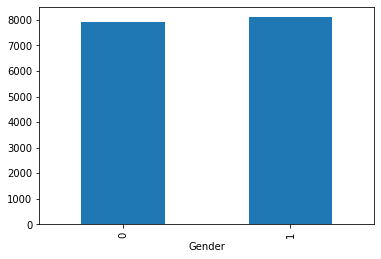

In [65]:
gen=data.groupby('Gender')['Purchase'].median().plot.bar()
gen

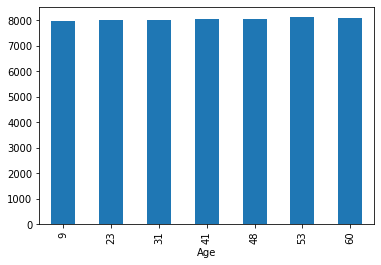

In [66]:
age=data.groupby('Age')['Purchase'].median().plot.bar()
age

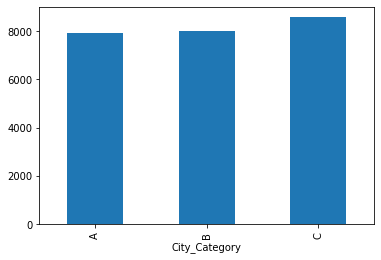

In [69]:
city=data2.groupby('City_Category')['Purchase'].median().plot.bar()
city

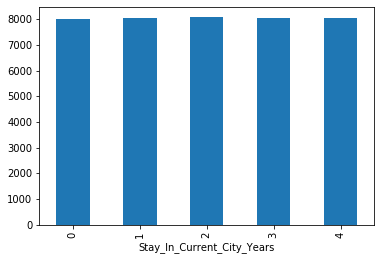

In [70]:
year=data.groupby('Stay_In_Current_City_Years')['Purchase'].median().plot.bar()
year

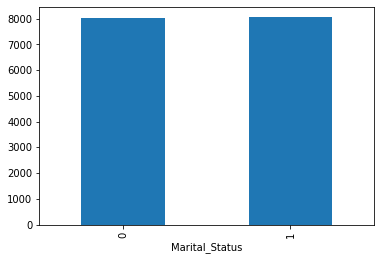

In [71]:
marital=data.groupby('Marital_Status')['Purchase'].median().plot.bar()
marital

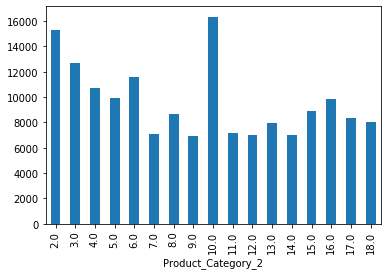

In [76]:
cat1=data2.groupby('Product_Category_2')['Purchase'].median().plot.bar()

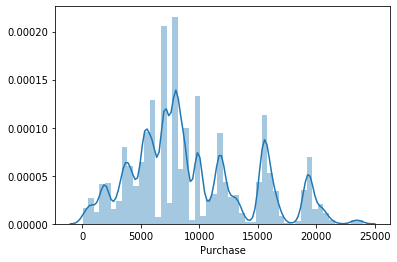

In [33]:
sns.distplot(data['Purchase'])

#DATA INFERRED FROM BIVARIATE ANALYSIS
1.More are person purchase is more i.e 55+ has more purchaces

2.City C has more purchase

3.Purchase b/w 5000-10000 is highest

In [38]:
#Handling Missing data
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [40]:
mn=data['Product_Category_2'].median()
print(mn)
md=data['Product_Category_2'].mode()[0]
print(md)

9.0
8.0


In [4]:
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])
test['Product_Category_2']=test['Product_Category_2'].fillna(test['Product_Category_2'].mode()[0])

In [23]:
matrix=data.corr()
matrix

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.002065,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.001566,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.010260,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.279247,0.229678,-0.343703
Product_Category_2,0.002065,0.001566,0.010260,0.279247,1.000000,0.543649,-0.128651
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.128651,-0.022006,1.000000


In [5]:
#Data inferred from the above matrix is that product_cat_2 and 3 are highly correlated 
#and also there was lot of missing values in prod_cat_3 so we delete it.
data.drop('Product_Category_3',axis=1,inplace=True)
test.drop('Product_Category_3',axis=1,inplace=True)


In [25]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [6]:
data['Gender'].replace('F',0,inplace=True)
data['Gender'].replace('M',1,inplace=True)
test['Gender'].replace('F',0,inplace=True)
test['Gender'].replace('M',1,inplace=True)

In [27]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,8.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,8.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,8.0,7969


In [ ]:
0-17     7986.0
18-25    8027.0
26-35    8030.0
36-45    8061.0
46-50    8036.0
51-55    8130.0
55+      8105.5

In [7]:
def age(age):
    if age=='0-17':  
        return 9
    elif age=='18-25':
        return 23
    elif age=='26-35':
        return 31
    elif age=='36-45':
        return 41
    elif age=='46-50':
        return 48
    elif age=='51-55':
        return 53
    else:
        return 60
age('0-17')    

9

In [8]:
data['Age']=data['Age'].apply(lambda x:age(x))

In [9]:
test['Age']=test['Age'].apply(lambda x:age(x))

In [31]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,9,10,A,2,0,3,8.0,8370
1,1000001,P00248942,0,9,10,A,2,0,1,6.0,15200
2,1000001,P00087842,0,9,10,A,2,0,12,8.0,1422
3,1000001,P00085442,0,9,10,A,2,0,12,14.0,1057
4,1000002,P00285442,1,60,16,C,4+,0,8,8.0,7969


In [10]:
city_cat=pd.get_dummies(data['City_Category'],drop_first=True)
city_cat_test=pd.get_dummies(test['City_Category'],drop_first=True)

In [11]:
data['Stay_In_Current_City_Years'].replace('4+','4',inplace=True)
test['Stay_In_Current_City_Years'].replace('4+','4',inplace=True)

In [34]:
data.var() #Calculate variance

User_ID               2.984573e+06
Gender                1.859382e-01
Age                   1.193874e+02
Occupation            4.254510e+01
Marital_Status        2.418379e-01
Product_Category_1    1.549376e+01
Product_Category_2    1.843923e+01
Purchase              2.523119e+07
dtype: float64

In [35]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,9,10,A,2,0,3,8.0,8370
1,1000001,P00248942,0,9,10,A,2,0,1,6.0,15200
2,1000001,P00087842,0,9,10,A,2,0,12,8.0,1422
3,1000001,P00085442,0,9,10,A,2,0,12,14.0,1057
4,1000002,P00285442,1,60,16,C,4,0,8,8.0,7969


In [12]:
data.drop(['User_ID','Product_ID','City_Category'],axis=1,inplace=True)
test.drop(['User_ID','Product_ID','City_Category'],axis=1,inplace=True)

In [13]:
data=pd.concat([data,city_cat],axis=1)
test=pd.concat([test,city_cat_test],axis=1)

In [39]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,0,9,10,2,0,3,8.0,8370,0,0
1,0,9,10,2,0,1,6.0,15200,0,0
2,0,9,10,2,0,12,8.0,1422,0,0
3,0,9,10,2,0,12,14.0,1057,0,0
4,1,60,16,4,0,8,8.0,7969,0,1


In [72]:
data.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
B                               uint8
C                               uint8
dtype: object

In [14]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype('uint8')


In [41]:
data.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      uint8
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
B                               uint8
C                               uint8
dtype: object

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data.drop('Purchase',axis=1),data['Purchase'],random_state=2)

In [43]:
xtrain.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,B,C
303331,1,31,0,0,0,1,2.0,0,1
17384,0,41,1,1,0,6,8.0,0,1
532453,0,31,14,4,0,5,8.0,1,0
276532,1,23,20,3,0,8,11.0,0,1
36785,0,41,20,4,0,1,11.0,1,0


In [22]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(xtrain,ytrain)
print(lreg.score(xtest,ytest))

0.12402151014300934


In [15]:
cat_1=pd.get_dummies(data['Product_Category_1'],drop_first=True,prefix='cat_1')
cat_2=pd.get_dummies(data['Product_Category_2'],drop_first=True,prefix='cat_2')

In [16]:
cat_1_test=pd.get_dummies(test['Product_Category_1'],drop_first=True,prefix='cat_1')
cat_2_test=pd.get_dummies(test['Product_Category_2'],drop_first=True,prefix='cat_2')

In [17]:
test.drop(['Product_Category_1','Product_Category_2'],axis=1,inplace=True)
test=pd.concat([test,cat_1_test,cat_2_test],axis=1)
test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,B,C,cat_1_2,cat_1_3,cat_1_4,...,cat_2_9.0,cat_2_10.0,cat_2_11.0,cat_2_12.0,cat_2_13.0,cat_2_14.0,cat_2_15.0,cat_2_16.0,cat_2_17.0,cat_2_18.0
0,1,48,7,2,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,31,17,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,41,1,4,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,41,1,4,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,31,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data.drop(['Product_Category_1','Product_Category_2'],axis=1,inplace=True)
data=pd.concat([data,cat_1,cat_2],axis=1)
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,B,C,cat_1_2,cat_1_3,...,cat_2_9.0,cat_2_10.0,cat_2_11.0,cat_2_12.0,cat_2_13.0,cat_2_14.0,cat_2_15.0,cat_2_16.0,cat_2_17.0,cat_2_18.0
0,0,9,10,2,0,8370,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,9,10,2,0,15200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9,10,2,0,1422,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,9,10,2,0,1057,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,60,16,4,0,7969,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:

xtrain1,xtest1,ytrain1,ytest1=train_test_split(data.drop(['Purchase','Gender','Occupation','Marital_Status','Stay_In_Current_City_Years','Age'],axis=1),data['Purchase'],random_state=2)

In [27]:
lreg2=LinearRegression().fit(xtrain1,ytrain1)
print(lreg2.score(xtest1,ytest1))

0.6420229910892613


In [28]:
xtrain1.head()

,B,C,cat_1_2,cat_1_3,cat_1_4,cat_1_5,cat_1_6,cat_1_7,cat_1_8,cat_1_9,...,cat_2_9.0,cat_2_10.0,cat_2_11.0,cat_2_12.0,cat_2_13.0,cat_2_14.0,cat_2_15.0,cat_2_16.0,cat_2_17.0,cat_2_18.0
303331,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17384,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
532453,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276532,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36785,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [86]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor().fit(xtrain1,ytrain1)
print(rfc.score(xtest1,ytest1))

/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6475010847381781


In [82]:
pr=np.log(data['Purchase'])

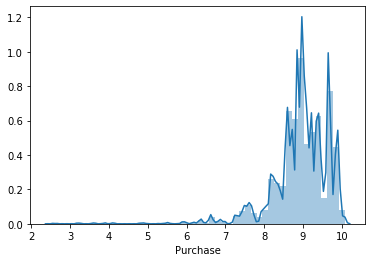

In [83]:
sns.distplot(pr)

In [91]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,B,C,cat_1_2,cat_1_3,...,cat_2_9.0,cat_2_10.0,cat_2_11.0,cat_2_12.0,cat_2_13.0,cat_2_14.0,cat_2_15.0,cat_2_16.0,cat_2_17.0,cat_2_18.0
0,0,9,10,2,0,8370,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,9,10,2,0,15200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9,10,2,0,1422,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,9,10,2,0,1057,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,60,16,4,0,7969,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,B,C,cat_1_2,cat_1_3,cat_1_4,...,cat_2_9.0,cat_2_10.0,cat_2_11.0,cat_2_12.0,cat_2_13.0,cat_2_14.0,cat_2_15.0,cat_2_16.0,cat_2_17.0,cat_2_18.0
0,1,48,7,2,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,31,17,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,41,1,4,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,41,1,4,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,31,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
rfr=RandomForestRegressor().fit(data.drop(['Purchase','Gender','Occupation','Marital_Status','Stay_In_Current_City_Years','Age'],axis=1),data['Purchase'])
predictions=rfr.predict(test.drop(['Gender','Occupation','Marital_Status','Stay_In_Current_City_Years','Age'],axis=1))

/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Number of features of the model must match the input. Model n_features is 37 and input n_features is 35 

In [95]:
data2['Product_Category_1'].nunique()

20

In [96]:
test2['Product_Category_1'].nunique()

18

In [30]:
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [32]:
data_full=pd.concat([data2,test2],axis=0)

/home/arpit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [33]:
pro_1=pd.get_dummies(data_full['Product_Category_1'],drop_first=True)
pro_2=pd.get_dummies(data_full['Product_Category_2'],drop_first=True)

In [34]:
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [35]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Purchase', 'B', 'C', 'cat_1_2', 'cat_1_3', 'cat_1_4',
       'cat_1_5', 'cat_1_6', 'cat_1_7', 'cat_1_8', 'cat_1_9', 'cat_1_10',
       'cat_1_11', 'cat_1_12', 'cat_1_13', 'cat_1_14', 'cat_1_15', 'cat_1_16',
       'cat_1_17', 'cat_1_18', 'cat_1_19', 'cat_1_20', 'cat_2_3.0',
       'cat_2_4.0', 'cat_2_5.0', 'cat_2_6.0', 'cat_2_7.0', 'cat_2_8.0',
       'cat_2_9.0', 'cat_2_10.0', 'cat_2_11.0', 'cat_2_12.0', 'cat_2_13.0',
       'cat_2_14.0', 'cat_2_15.0', 'cat_2_16.0', 'cat_2_17.0', 'cat_2_18.0'],
      dtype='object')

In [37]:
print(data.shape)
print(test.shape)

(550068, 43)
(233599, 40)


In [39]:
pro_1.shape

(783667, 19)

In [43]:
prod_1=pro_1.iloc[:550068,:]
prod_2=pro_2.iloc[:550068,:]

In [55]:
prod_1_test=pro_1.iloc[550068:,:]
prod_2_test=pro_2.iloc[550068:,:]

In [44]:
prod_1.shape

(550068, 19)

In [47]:
colss=['cat_1_2', 'cat_1_3', 'cat_1_4',
       'cat_1_5', 'cat_1_6', 'cat_1_7', 'cat_1_8', 'cat_1_9', 'cat_1_10',
       'cat_1_11', 'cat_1_12', 'cat_1_13', 'cat_1_14', 'cat_1_15', 'cat_1_16',
       'cat_1_17', 'cat_1_18', 'cat_1_19', 'cat_1_20', 'cat_2_3.0',
       'cat_2_4.0', 'cat_2_5.0', 'cat_2_6.0', 'cat_2_7.0', 'cat_2_8.0',
       'cat_2_9.0', 'cat_2_10.0', 'cat_2_11.0', 'cat_2_12.0', 'cat_2_13.0',
       'cat_2_14.0', 'cat_2_15.0', 'cat_2_16.0', 'cat_2_17.0', 'cat_2_18.0']

In [48]:
data.drop(colss,axis=1,inplace=True)

In [49]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,B,C
0,0,9,10,2,0,8370,0,0
1,0,9,10,2,0,15200,0,0
2,0,9,10,2,0,1422,0,0
3,0,9,10,2,0,1057,0,0
4,1,60,16,4,0,7969,0,1


In [50]:
data=pd.concat([data,prod_1,prod_2],axis=1)

In [52]:
data.shape

(550068, 43)

In [56]:
prod_1_test.shape

(233599, 19)

In [59]:
test.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'B', 'C', 'cat_1_2', 'cat_1_3', 'cat_1_4', 'cat_1_5',
       'cat_1_6', 'cat_1_7', 'cat_1_8', 'cat_1_9', 'cat_1_10', 'cat_1_11',
       'cat_1_12', 'cat_1_13', 'cat_1_14', 'cat_1_15', 'cat_1_16', 'cat_1_17',
       'cat_1_18', 'cat_2_3.0', 'cat_2_4.0', 'cat_2_5.0', 'cat_2_6.0',
       'cat_2_7.0', 'cat_2_8.0', 'cat_2_9.0', 'cat_2_10.0', 'cat_2_11.0',
       'cat_2_12.0', 'cat_2_13.0', 'cat_2_14.0', 'cat_2_15.0', 'cat_2_16.0',
       'cat_2_17.0', 'cat_2_18.0'],
      dtype='object')

In [60]:
colsss=['cat_1_2', 'cat_1_3', 'cat_1_4', 'cat_1_5',
       'cat_1_6', 'cat_1_7', 'cat_1_8', 'cat_1_9', 'cat_1_10', 'cat_1_11',
       'cat_1_12', 'cat_1_13', 'cat_1_14', 'cat_1_15', 'cat_1_16', 'cat_1_17',
       'cat_1_18', 'cat_2_3.0', 'cat_2_4.0', 'cat_2_5.0', 'cat_2_6.0',
       'cat_2_7.0', 'cat_2_8.0', 'cat_2_9.0', 'cat_2_10.0', 'cat_2_11.0',
       'cat_2_12.0', 'cat_2_13.0', 'cat_2_14.0', 'cat_2_15.0', 'cat_2_16.0',
       'cat_2_17.0', 'cat_2_18.0']

In [61]:
test.drop(colsss,axis=1,inplace=True)
test=pd.concat([test,prod_1_test,prod_2_test],axis=1)

In [62]:
test.shape

(233599, 42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor().fit(data.drop(['Purchase','Gender','Occupation','Marital_Status','Stay_In_Current_City_Years','Age'],axis=1),data['Purchase'])
predictions=rfr.predict(test.drop(['Gender','Occupation','Marital_Status','Stay_In_Current_City_Years','Age'],axis=1))

/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
predictions

array([13398.60658832, 11087.0401584 ,  6195.39678089, ...,
       12648.30808859, 19964.38677353,  2205.18651192])

In [78]:
submit2=pd.DataFrame()


In [80]:
submit2['User_ID']=test2['User_ID']

In [79]:
submit2['Purchase']=predictions

In [81]:

submit2['Product_ID']=test2['Product_ID']
submit2.to_csv('friday_sub2.csv',index=False)